In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import pickle

In [173]:
run_up = np.array(np.load('keypoints/run_up.npy', allow_pickle=True))
take_off = np.array(np.load('keypoints/take_off.npy', allow_pickle=True))
flight = np.array(np.load('keypoints/flight.npy', allow_pickle=True))
landing = np.array(np.load('keypoints/landing.npy', allow_pickle=True))

In [176]:
def train_model_metrics_eval(df, title, x_metric, y_metric):

    scaler = StandardScaler()
    oc_svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.1, verbose=True)

    train = df[:len(df)-25]
    test = df[len(df)-25:]
    
    train = scaler.fit_transform(train)
    test = scaler.transform(test)
    
    
    oc_svm.fit(train)
    
    y_test = oc_svm.predict(test)

    xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = oc_svm.decision_function(grid_points)
    Z = Z.reshape(xx.shape)
    
    plt.title(f"Anomaly Detection - {title}")
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
    plt.scatter(train[:, 0], train[:, 1], c='white', s=20, edgecolor='k', label='Training data')
    plt.scatter(test[:, 0], test[:, 1], c='green', s=20, edgecolor='k', label='Test data')
    plt.xlabel(f'{x_metric}')
    plt.ylabel(f'{y_metric}')
    plt.legend()
    plt.show()
    
    inside = oc_svm.decision_function(grid_points) >= 0
    contour_center = grid_points[inside].mean(axis=0)
    print("Contour center:", contour_center)
    
    with open(f'models/{title}.pkl', 'wb') as f:
        pickle.dump(oc_svm, f)

[LibSVM]*
optimization finished, #iter = 25
obj = 47.198435, rho = 7.625097
nSV = 16, nBSV = 14


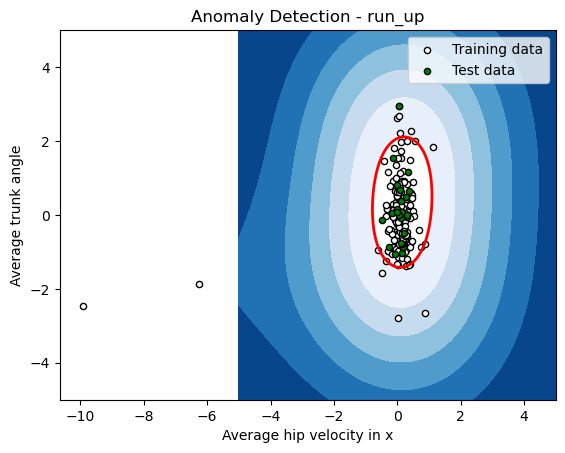

Contour center: [0.15462217 0.34210085]


In [184]:
df = []
for sample in run_up:
    sample = np.array(sample)
    df.append([np.mean(sample[:, 1]), np.mean(sample[:, 3])])


train_model_metrics_eval(df, 'run_up', 'Average hip velocity in x', 'Average trunk angle')

[LibSVM]*
optimization finished, #iter = 21
obj = 43.083482, rho = 6.406870
nSV = 16, nBSV = 12


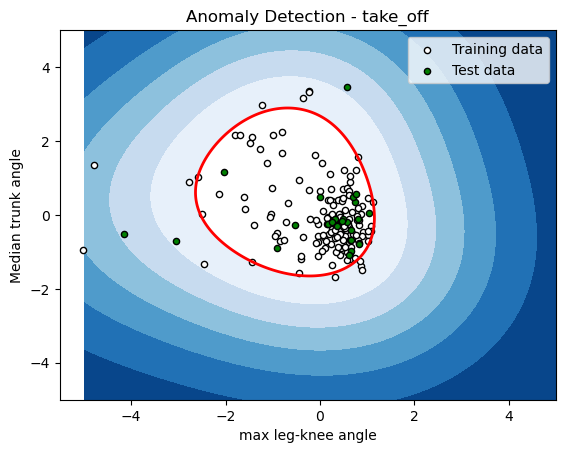

Contour center: [-0.68005975  0.56432512]


In [185]:
df = []
for sample in take_off:
    sample = np.array(sample)
    df.append([max(np.max(sample[:, 4]),np.max(sample[:, 5])), np.median(sample[:, 3])])
    
train_model_metrics_eval(df, 'take_off', 'max leg-knee angle', 'Median trunk angle')

[LibSVM]*
optimization finished, #iter = 25
obj = 33.525479, rho = 5.746360
nSV = 15, nBSV = 11


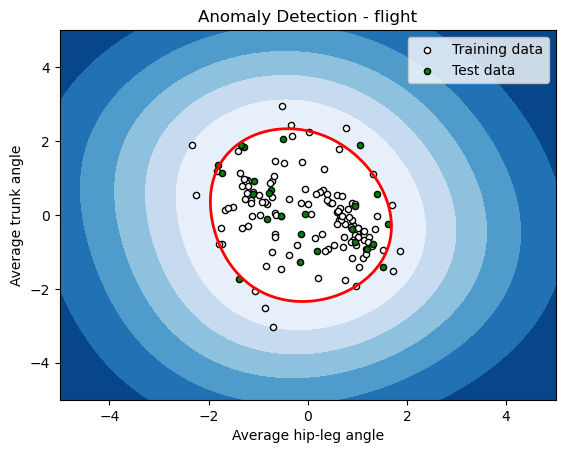

Contour center: [-0.17059794 -0.01187459]


In [187]:
df = []
for sample in flight:
    sample = np.array(sample)
    if len(sample.shape) == 1:
        continue
    df.append([np.mean(sample[:, 6]), np.mean(sample[:, 3])])
train_model_metrics_eval(df, 'flight', 'Average hip-leg angle', 'Average trunk angle')

[LibSVM]*
optimization finished, #iter = 24
obj = 39.580739, rho = 6.602071
nSV = 14, nBSV = 10


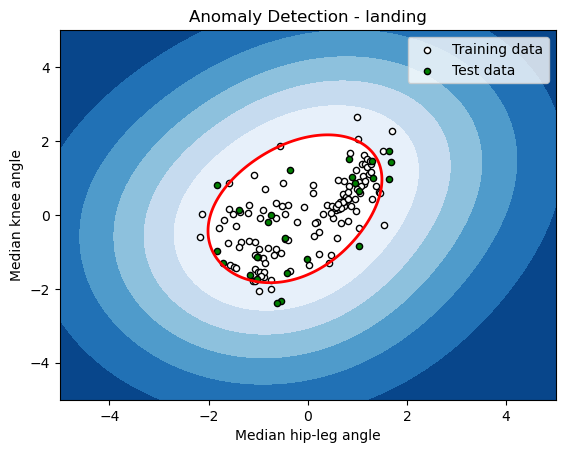

Contour center: [-0.25277226  0.1745213 ]


In [188]:
df = []
for sample in flight:
    sample = np.array(sample)
    if len(sample.shape) == 1:
        continue
    df.append([np.median(sample[:, 6]), np.median(sample[:, 5])])
train_model_metrics_eval(df, 'landing', 'Median hip-leg angle', 'Median knee angle')